### QUESTAO 1 

### Quais são os países mais livres do mundo no ano de 2024?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfPaises= pd.read_csv('world_happiness_report.csv')

df_2024 = dfPaises[dfPaises['Year'] == 2024]

max_freedom = df_2024['Freedom'].max()

    
paises_mais_livres = df_2024[df_2024['Freedom'] == max_freedom]['Country'].values

print("País(es) mais livre(s) em 2024:", paises_mais_livres)



País(es) mais livre(s) em 2024: ['UK' 'South Africa']


### QUESTAO 2

### Quais são os 3 países mais felizes?

Os 3 países mais felizes são:
      Country  Year  Happiness_Score
363     India  2022             8.00
3532   Canada  2019             8.00
3979  Germany  2017             7.99


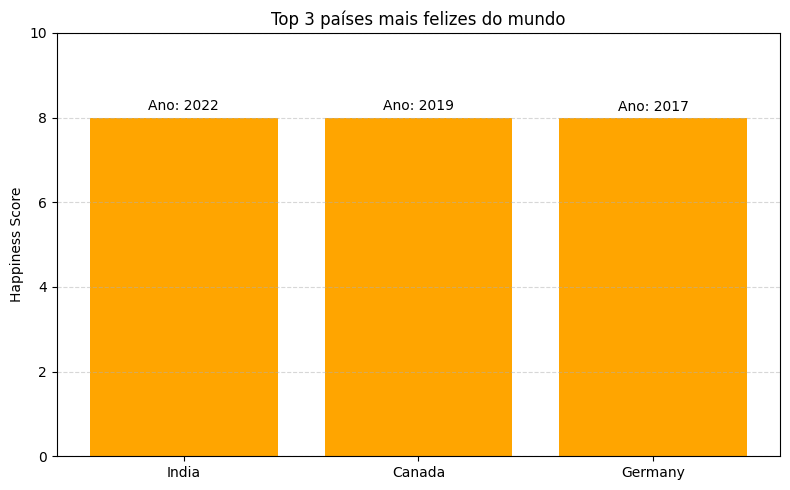

In [2]:
idx_max_happiness = dfPaises.groupby('Country')['Happiness_Score'].idxmax()
df_felicidade_top = dfPaises.loc[idx_max_happiness][['Country', 'Year', 'Happiness_Score']]

# Ordenar pelos países mais felizes
top_3_felizes = df_felicidade_top.sort_values(by='Happiness_Score', ascending=False).head(3)

# Exibe os dados
print("Os 3 países mais felizes são:")
print(top_3_felizes)

# Gráfico com rótulo do ano em cada barra
plt.figure(figsize=(8, 5))
bars = plt.bar(top_3_felizes['Country'], top_3_felizes['Happiness_Score'], color='orange')
plt.title('Top 3 países mais felizes do mundo')
plt.ylabel('Happiness Score')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona o ano como rótulo acima de cada barra
for bar, year in zip(bars, top_3_felizes['Year']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"Ano: {int(year)}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### QUESTAO 3

### Qual foi o melhor ano da educação no Brasil?

In [3]:
df_brasil = dfPaises[dfPaises['Country'] == 'Brazil']

# Encontrar o ano com o maior Education_Index
melhor_ano = df_brasil.loc[df_brasil['Education_Index'].idxmax()]

print("Melhor ano da educação no Brasil:")
print(f"Ano: {int(melhor_ano['Year'])}")

Melhor ano da educação no Brasil:
Ano: 2013


### QUESTAO 4

### Gráfico comparando a confiança das pessoas nas instituições públicas durante os anos de 2005 ate 2024 no Brasil

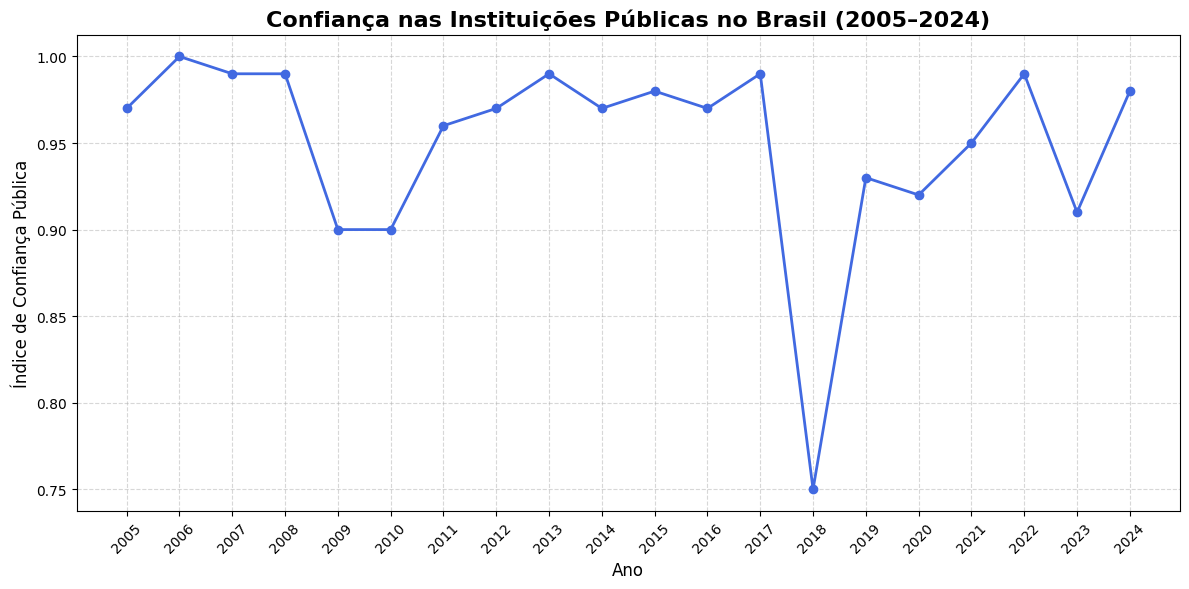

In [4]:
df_brasil = dfPaises[(dfPaises['Country'] == 'Brazil') & (dfPaises['Year'].between(2005, 2024))]

# Remover anos duplicados, mantendo o maior índice de confiança por ano
df_brasil = df_brasil.sort_values(by='Public_Trust', ascending=False).drop_duplicates(subset='Year')
df_brasil = df_brasil.sort_values(by='Year')

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_brasil['Year'], df_brasil['Public_Trust'], marker='o', linestyle='-', color='royalblue', linewidth=2)

# Personalização
plt.title('Confiança nas Instituições Públicas no Brasil (2005–2024)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Índice de Confiança Pública', fontsize=12)
plt.xticks(df_brasil['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()